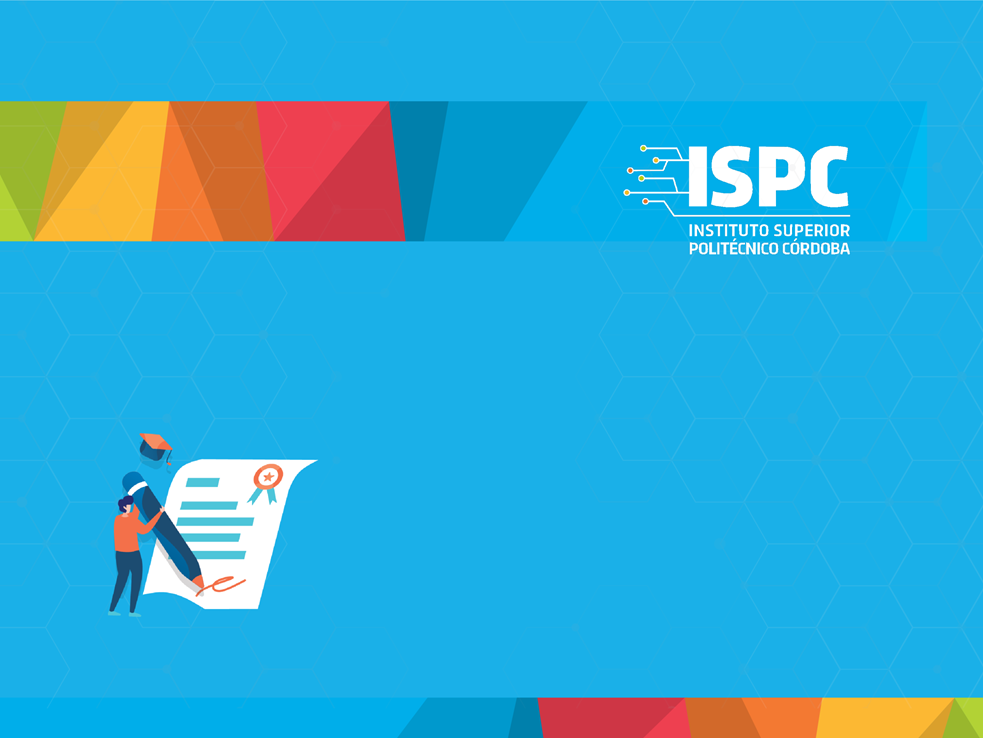

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# # Subir a repositorio de Github, con al menos un pull request, y devolver el link

# Hacer un fork de este repositorio y trabajar sobre ese archivo


1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.


In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import datasets

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


In [2]:
# Datos
# ==============================================================================

#PONER CODIGO AQUI

datos = datasets.load_iris()
datos = pd.DataFrame(data = np.c_[datos['data'],
                     datos['target']],
                     columns = datos['feature_names'] + ['target'])

In [3]:
datos

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'target')
y = datos['target']

#PONER CODIGO AQUI

X_train , X_test , y_train, y_test = train_test_split(X, 
                                                      y, 
                                                      test_size = 0.2,
                                                      random_state = 0)


In [5]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = svm.SVC(kernel='linear',C = 1)


#PONER CODIGO AQUI
modelo.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [6]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");

AttributeError: 'DataFrame' object has no attribute 'X1'

In [7]:
# Predicciones test
# ==============================================================================

#PONER CODIGO AQUI
pred = modelo.predict(X_test)
pred

array([2., 1., 0., 2., 0., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 2., 1., 0., 0., 2., 0., 0., 1., 1., 0.])

In [9]:
# Accuracy de test del modelo 
# ==============================================================================

#PONER CODIGO AQUI
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = pred,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 100.0%


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



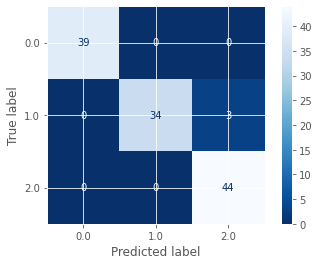

In [11]:
print(classification_report(y_test, pred))
plot_confusion_matrix(modelo, X_train,y_train, cmap='Blues_r')

## Prueba de distintos modelos con pycaret

In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [13]:
datos.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


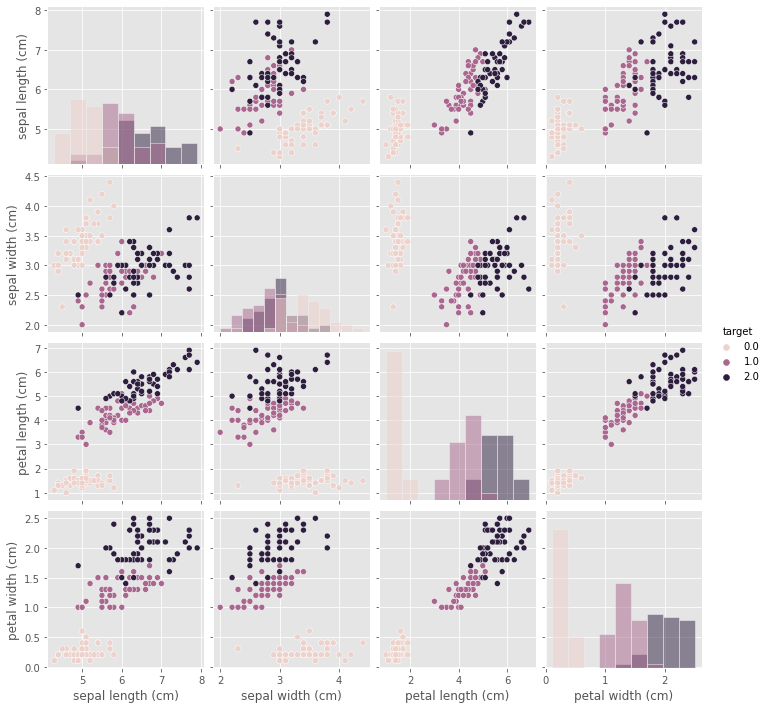

In [15]:
sns.pairplot(datos, diag_kind ='hist' , hue="target")
plt.show()

In [16]:
def correlationMap(df, target) :
    classes = df[target].unique()
    if df[target].dtype == 'O' :
        df[target+'_id'] = (df[target]== classes[0]).astype(int) #encode string target 
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(12, 9))
    sns.heatmap(corr, vmax=.8,annot=True, square=True)
    if df[target].dtype == 'O' :
        df.drop([target+'_id'], axis=1, inplace=True)
    # fix for matplotlib bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # Gets the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

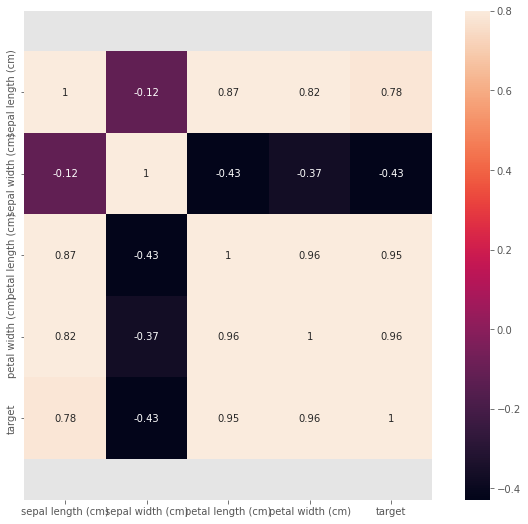

In [17]:
correlationMap(datos,'target')

In [18]:
data = datos.sample(frac=0.70, random_state=786)
data_unseen = datos.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data para modelar: ' + str(data.shape))
print('Data para predecir: ' + str(data_unseen.shape))

Data para modelar: (105, 5)
Data para predecir: (45, 5)


In [19]:
from pycaret.classification import *

ImportError: cannot import name 'available_if' from 'sklearn.utils.metaestimators' (/Users/karinaalem/opt/anaconda3/envs/virtual/lib/python3.9/site-packages/sklearn/utils/metaestimators.py)